<center>

## Predictive Analytics

### ALY 6020, CRN 80405

### Professor Vladimir Shapiro

### Module 3: Midweek Project - Loan Approval Analysis

#### Submitted By - Richa Umesh Rambhia


---

## **Implementation of Logistic Regression** - Loan Approval Data



---

</center>


# Table of Contents

### 1.   Introduction
### 2.   Analysis
### 3.   Results
### 4.   Conclusion
### 5.   References

# **Introduction**

---



### **Logistic Regression Algorithm**


---

Logistic Regression is a *statistical type of machine learning model* that helps in the **classification and predictive analytics** in order to estimate the probability and likelihood of an event occuring. [1] The difference between a Linear Regression model and a Logistic Regression model is that Linear Regression algorithms are used to identify relationships between a continuous dependent variable and one or more independent variable, whereas Logistic Regression models are used to **predict a category based on categorical type** variable versus the continuous data points.

The different types of Logistic Regression algorithms which are defined based on the categorical data points are as follows.

1. **Binary Logistic Regression**

2. **Multinomial Logistic Regression**

3. **Ordinal Logistic Regression**

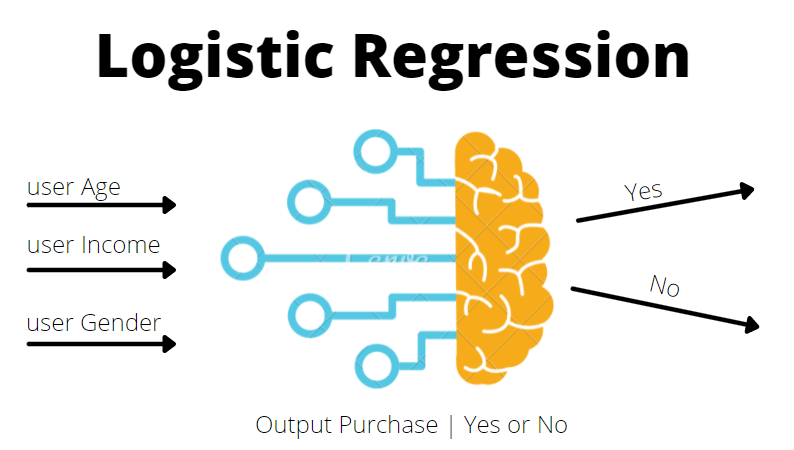
##### <center> <b> <i> Figure 1. Logistic Regression Diagram [2] </center> </b> </i>

**Problem Statement**

---


Loan Approval. Your bank has gotten a list of loans and doesn’t have time to approve or reject them tomorrow. You decided to use logistic regression analysis to help you make that decision. Perform the analysis and also be ready to answer the following three questions to your boss tomorrow morning:

1. What were the three most significant variables?
2. Which of those three had the most negative influence on loan acceptance?
3. How accurate was the model overall, and what was the precision rate?

### **Loan Approval Prediction - Banking Dataset**


---

The Loan Approval prediction analysis is implemented on the banking dataset that has over **5000 rows of data and 14 field values** where the goal is to **build a Logistic Regression model (Binary Classification) to predict the likelihood of approving or rejecting the loans for customers**. The various factors that affect the loan parameter can be further analyzed in order to understand which of these features contribute in the approval of a loan. The features present in the banking dataset are *ID, Age, Education, Experience, CreditCard, Family, Mortgage, etc.* that will help in analzying the various independent variables to classify and predict the target variable, which in this case is the **'Personal Loan'**.

# **Analysis**



---


### **Installing required packages**

In [78]:
!pip install pandas_profiling
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from featurewiz import featurewiz
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

### **Loading the dataset**

In [2]:
banking_data = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
banking_data

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

<center> <i> Table 1. Loan Approval Dataframe </center> </i>

## <center> <b> Data Dictionary </center> </b> 
<center><i> (To understand each of the parameters of the dataset) </center> </i>



---
<center>

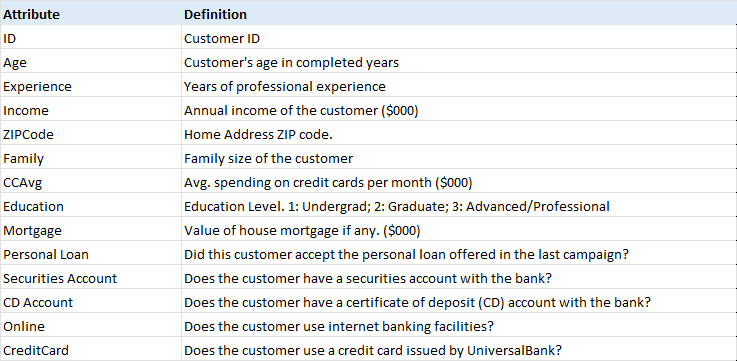

</center>

<center> <i> Table 2. Data Dictionary for Loan Approval Dataset </center> </i>

### **Step 1: Exploratory Data Analysis**

EDA is performed on the data in order to analyze various parameters and features of the dataset and to understand the *structure* of the dataset such that various *trends and patterns* between the variables is known. Exploratory Data Analysis helps in understanding the *relationship between the various independent and dependent variables* of the dataset that would further be useful in building the model such as description analysis and statistical analysis.


---



#### **Descriptive Analysis**

In [81]:
# displaying number of rows and columns
print("Total number of Rows and Columns:", banking_data.shape)

print("\n-------------------------------------------------------")

# displaying field values/column names
print("\nColumn Names:\n") 
banking_data.columns

Total number of Rows and Columns: (5000, 14)

-------------------------------------------------------

Column Names:



Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [82]:
# displaying data types
print("Data types:\n")
banking_data.dtypes

Data types:



ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

From the *descriptive analysis*, it is observed that there are total **5000 rows** **of data** and **14 field values** and the data type for each of the field value is displayed in order to understand what data type values are present in the dataset.

Here, there are different types of data points that are present in the dataset which are **numerical data type** having either *'int' or 'float'* values.

#### **Statistical Analysis**

In [83]:
# dataset info

print("Dataset Info:\n")
banking_data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [84]:
# describing the dataset

print("Describing the dataset:\n")
round(banking_data.describe(),1)

Describing the dataset:



ID     Age  Experience  Income  ZIP Code  Family   CCAvg  \
count  5000.0  5000.0      5000.0  5000.0    5000.0  5000.0  5000.0   
mean   2500.5    45.3        20.1    73.8   93152.5     2.4     1.9   
std    1443.5    11.5        11.5    46.0    2121.9     1.1     1.7   
min       1.0    23.0        -3.0     8.0    9307.0     1.0     0.0   
25%    1250.8    35.0        10.0    39.0   91911.0     1.0     0.7   
50%    2500.5    45.0        20.0    64.0   93437.0     2.0     1.5   
75%    3750.2    55.0        30.0    98.0   94608.0     3.0     2.5   
max    5000.0    67.0        43.0   224.0   96651.0     4.0    10.0   

       Education  Mortgage  Personal Loan  Securities Account  CD Account  \
count     5000.0    5000.0         5000.0              5000.0      5000.0   
mean         1.9      56.5            0.1                 0.1         0.1   
std          0.8     101.7            0.3                 0.3         0.2   
min          1.0       0.0            0.0                 0.0         0.0   
25%          1.0       0.0            0.0                 0.0         0.0   
50%          2.0       0.0            0.0                 0.0         0.0   
75%          3.0     101.0            0.0                 0.0         0.0   
max          3.0     635.0            1.0                 1.0         1.0   

       Online  CreditCard  
count  5000.0      5000.0  
mean      0.6         0.3  
std       0.5         0.5  
min       0.0         0.0  
25%       0.0         0.0  
50%       1.0         0.0  
75%       1.0         1.0  
max       1.0         1.0

<center> <i> Table 3. Dataset Description </center> </i>

*Statistical Analysis* helps in understanding about each of the numerical field type based on the **total count values, minimum value, maximum value, standard deviation**, etc. giving an overall analysis of the field data points about the various rows present in the dataset.

For example, as observed in the dataset, we see that there are multiple field values having the *minimum, maximum values* along with the *total* *count of values* which is **5000** and *standard deviation* of the column values. It can be observed that the maximum value of *Age* is **67** and the maximum value of *Income* is **224.0**. 

Thus, similarly, other parameters of the dataset can be analyzed based on their statistical values.

### **Data Profiling**

In [85]:
bankingdata_report = banking_data.profile_report(title='Loan Approval Analysis Report', explorative = True)
bankingdata_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
# Saving the profile report 
bankingdata_report.to_file(output_file="Loan Approval Analysis Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The data profiling report generated for the dataset helps in understanding various parameters such as the data type of the field values, the missing and duplicate values present in the dataset, the correlation between each of the field value, and the analysis of each of the field value on a individual basis based on correlation plot, histogram, and interaction graphs.

From the profiling report, it is observed that there are **7 numerical variable type and 7 categorical data type** field values present in the dataset of which the numerical data type have **integer and float values**. Also, there are **no missing values or duplicate values** present in the dataset, and the missing values visualization or plot also helps in understanding that there are no missing values present in the dataset, and for each field value a separate visualization is displayed in order to specifially analyze a particular field value. 

Further cleaning of the data is implemented in the below steps.

### **Step 2: Data Cleaning**



---

1. Checking for null values in each column of the dataset, i.e., missing or bad values

2. Checking for unique data in the field values

3. Checking for outliers in the dataset

  a. *Boxplot*
  
  b. *Distribution Plot*



---



**1. Checking for null values in each column of the dataset, i.e., missing or bad values**

In [87]:
for x in range(14):
    print("%-45s %10d" % (banking_data.columns.values[x], banking_data.iloc[:,x].isna().sum()))

ID                                                     0
Age                                                    0
Experience                                             0
Income                                                 0
ZIP Code                                               0
Family                                                 0
CCAvg                                                  0
Education                                              0
Mortgage                                               0
Personal Loan                                          0
Securities Account                                     0
CD Account                                             0
Online                                                 0
CreditCard                                             0


<center> <i> Table 4. Missing Values Count </center> </i>

The code above shows that there are **no missing values** present in the dataset. The **isna()** function is used in order to display and check the 'Null' or 'NA' values that are present in each of the field values of the dataset.

In [88]:
# displaying the starting rows of the dataset

print("Displaying the first 10 rows of data")
banking_data.head()

Displaying the first 10 rows of data


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<center> <i> Table 5. First 10 rows of the dataset </center> </i>

In [89]:
# displaying the end rows of the dataset

print("Displaying the last 10 rows of data")
banking_data.tail()

Displaying the last 10 rows of data


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<center> <i> Table 6. Last 10 rows of the dataset </center> </i>

**2. Checking for unique data in the field values**

In [90]:
# displaying unique data 

print("Displaying the unique data present in columns\n")
banking_data.nunique()

Displaying the unique data present in columns



ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<i> Table 7. Unique Data </i>

**3. Checking for outliers in the dataset**

a. Boxplot



---

The below code creates **boxplots** for the various field values of the bank dataset in order to check for outliers present in the dataset. Here, the boxplots are implemented for the variables **Age**, **Income**, **Mortgage**, and **Personal Loan**, as shown in the below figures. The outliers that are present in the dataset will not be removed as each of the data point is important for analysis and model building.

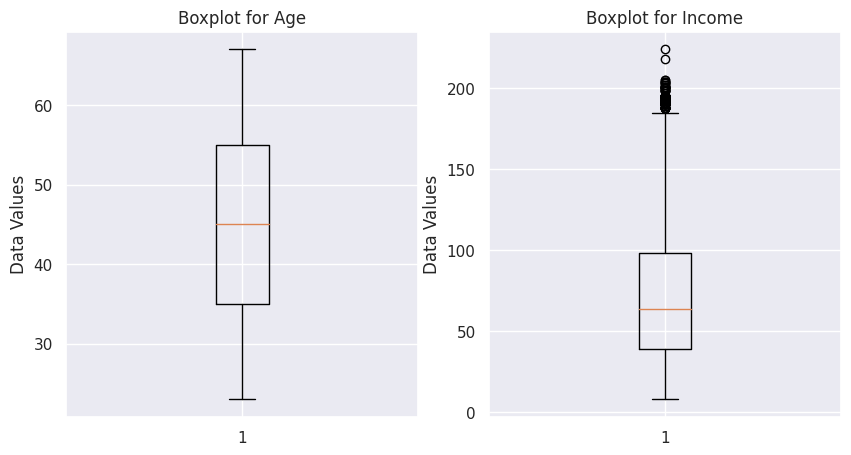

In [91]:
# creating boxplot for 'Age' and 'Income' variable

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(banking_data['Age'])
axs[1].boxplot(banking_data['Income'])
axs[0].set_title('Boxplot for Age')
axs[1].set_title('Boxplot for Income')
axs[0].set_ylabel('Data Values')
axs[1].set_ylabel('Data Values')

plt.show()

##### <center> <b> <i> Figure 2. Boxplot for Age & Income </center> </b> </i>

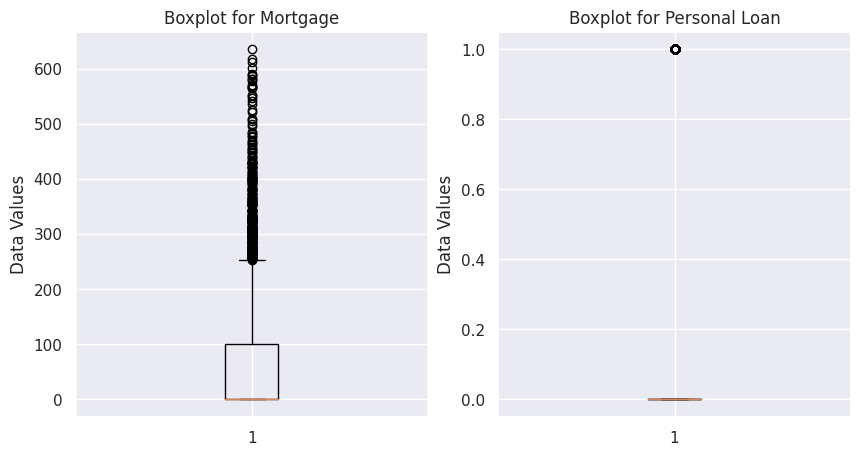

In [92]:
# creating boxplot for 'Mortgage' and 'Personal Loan' variable

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(banking_data['Mortgage'])
axs[1].boxplot(banking_data['Personal Loan'])
axs[0].set_title('Boxplot for Mortgage')
axs[1].set_title('Boxplot for Personal Loan')
axs[0].set_ylabel('Data Values')
axs[1].set_ylabel('Data Values')

plt.show()

##### <center> <b> <i> Figure 3. Boxplot for Mortgage & Personal Loan </center> </b> </i>

b. Distribution Plot


---

The distribution plot for the various parameters of the dataset values gives an overview of the outliers that are present and the distribution of the data points across present in the dataset. 

The plot below for *Age* shows that the data is **normally distributed** across the data points, meaning that the data points are evenly distributed around the mean value. However, the plot for the *Income* variable indicates that the data is **right skewed**, i.e., the data is concentrated towards a certain range of values and is not equally distributed.

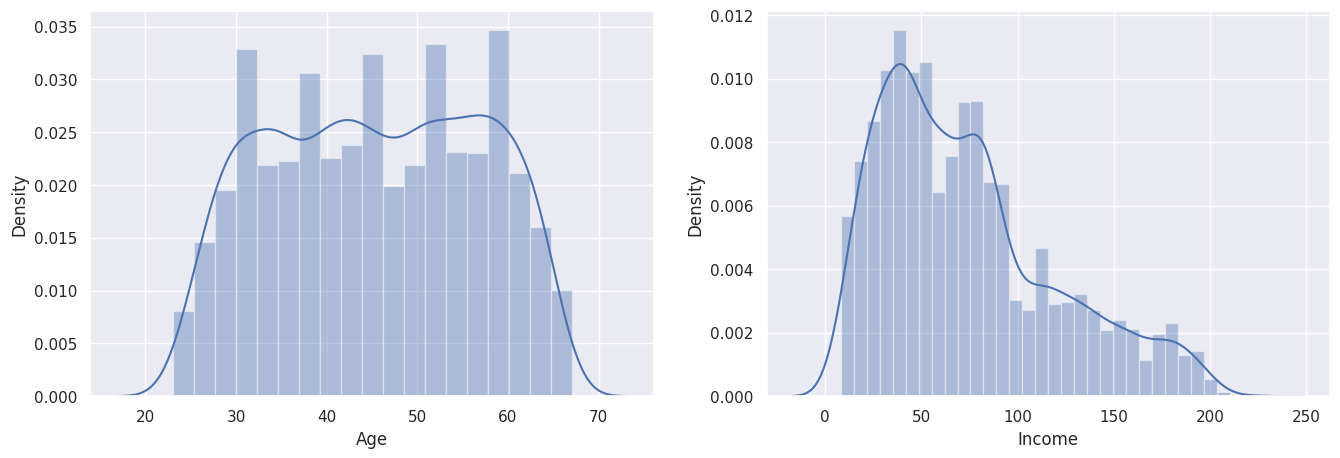

In [94]:
# distribution plot for the Age & Income

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(banking_data['Age'])
plt.subplot(1,2,2)
sns.distplot(banking_data['Income'])
plt.show()

##### <center> <b> <i> Figure 4. Distribution Plot for Age & Income </center> </b> </i>

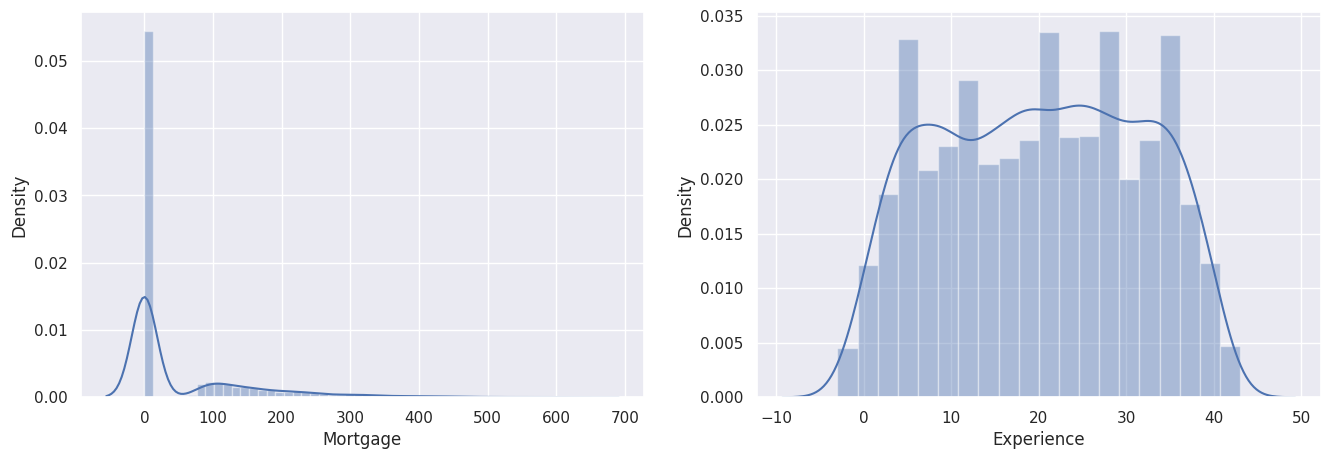

In [95]:
# distribution plot for the Mortgage & Experience

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(banking_data['Mortgage'])
plt.subplot(1,2,2)
sns.distplot(banking_data['Experience'])
plt.show()

##### <center> <b> <i> Figure 5. Distribution Plot for Mortgage & Experience </center> </b> </i>

Here, the distribution plot for *'Mortgage'* is **right skewed**, whereas for *'Experience'* the plot is **normally distributed**. Thus the distribution plots help in analyzing the data points that are present in the dataset that could further help in understanding the relationship between the independent and target variables.

### **Step 3: Data Visualization**



---






Text(0.5, 1.0, '\nPersonal Loan Variable count')

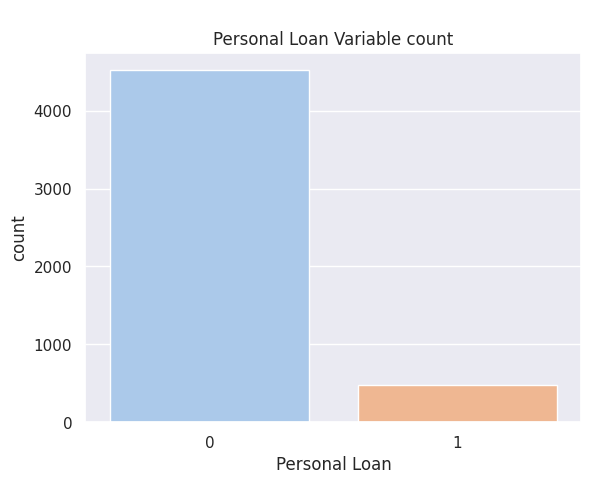

In [96]:
# 1. Personal Loan Count Analysis

sns.countplot(x='Personal Loan', data=banking_data, palette="pastel")
plt.title('\nPersonal Loan Variable count')

##### <center> <b> <i> Figure 6. Graph of Personal Loan Count </center> </b> </i>

From the above graph of *Personal Loan Variable Count*, it is observed that the data is **biased towards one class** of loan not getting approved, and hence there is a possibility that the model will be biased to this class which will classify majority of the data points into loan not getting approved.

Text(0.5, 1.0, '\nAnalysis of CreditCard vs Personal Loan')

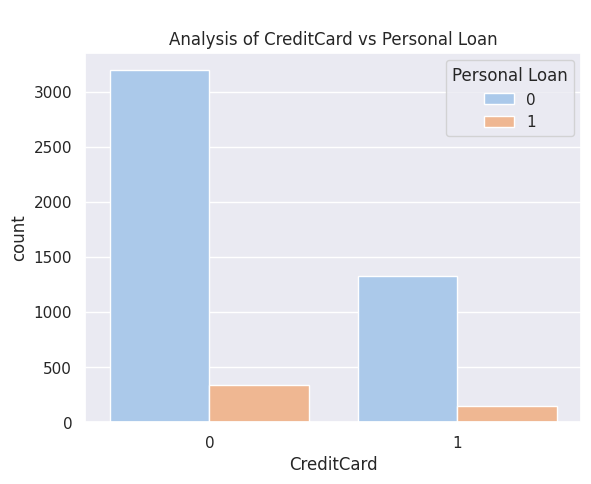

In [98]:
# 2. Analysis of CreditCard vs Personal Loan

sns.countplot(x='CreditCard',data=banking_data,hue='Personal Loan', palette="pastel")
plt.title("\nAnalysis of CreditCard vs Personal Loan")

##### <center> <b> <i> Figure 7. Analysis of CreditCard vs Personal Loan </center> </b> </i>

The graph of CreditCard versus Personal Loan helps in analyzing the influence of the features or independent variables on the target variable, which is the Personal Loan parameter. Here, it is observed that customers who do not have a credit card issued from the bank are mostly likely to get their loan rejected. Hence, if the value of CreditCard is low, the likelihood of loan getting accepted is also low.

Text(0.5, 1.0, '\nAnalysis of Online vs Personal Loan')

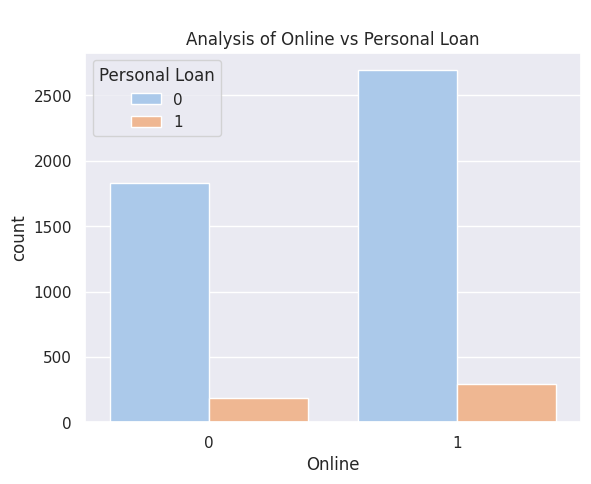

In [99]:
# 3. Analysis of Online (using internet banking) vs Personal Loan

sns.countplot(x='Online',data=banking_data,hue='Personal Loan', palette="pastel")
plt.title("\nAnalysis of Online vs Personal Loan")

##### <center> <b> <i> Figure 8. Analysis of Online vs Personal Loan </center> </b> </i>

The analysis of Online vs Personal Loan graph indicates that the loan is rejected for the customers using the internet banking facilities. As we have observed earlier, due to the bias in the categories present in the dataset, the data points are majorly classified into category 0, i.e., loan getting rejected. Hence, it is important to consider the class bias issue while building the model.

### **Step 4: Pre-Modeling Steps**



---

1. Feature Selection & Extraction

2. Correlation Plot

3. Defining the features for model training

4. Spliting the dataset into train & test set

5. Standardization

---



**1. Feature Selection and Extraction**

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (5000, 14)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S

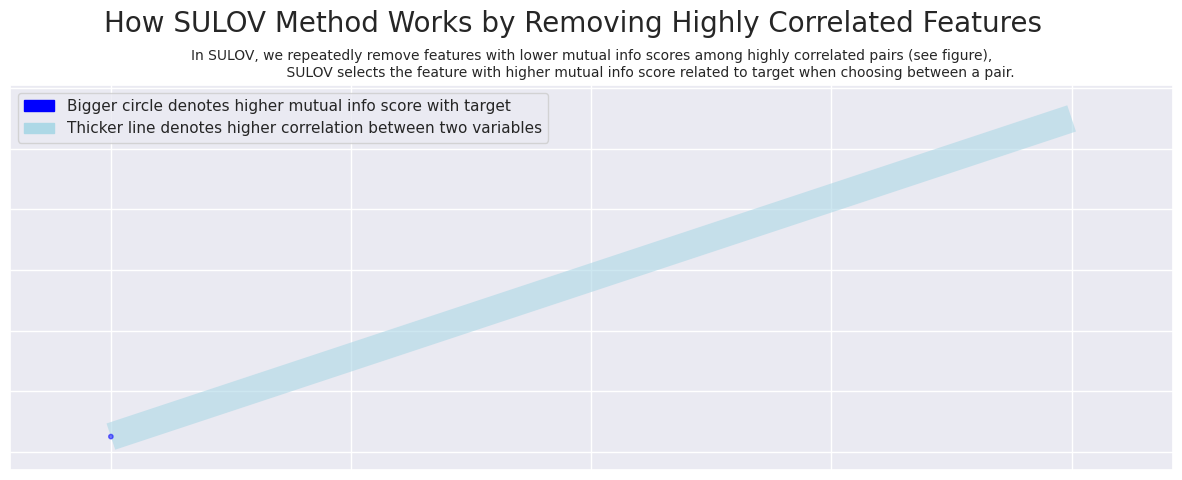

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 11
Final list of selected 11 vars after SULOV = ['CCAvg', 'CDAccount', 'CreditCard', 'Education', 'Family', 'Income', 'Mortgage', 'Online', 'SecuritiesAccount', 'ZIPCode', 'Age']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 11 
    Taking top 3 features per iteration...
    XGBoost version using 1.7.5 as tree method: gpu_hist
Number of booster rounds = 100
        using 11 variables...
Regular XGBoost is crashing due to: [21:12:33] ../src/gbm/gbtree.cc:625: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visibl

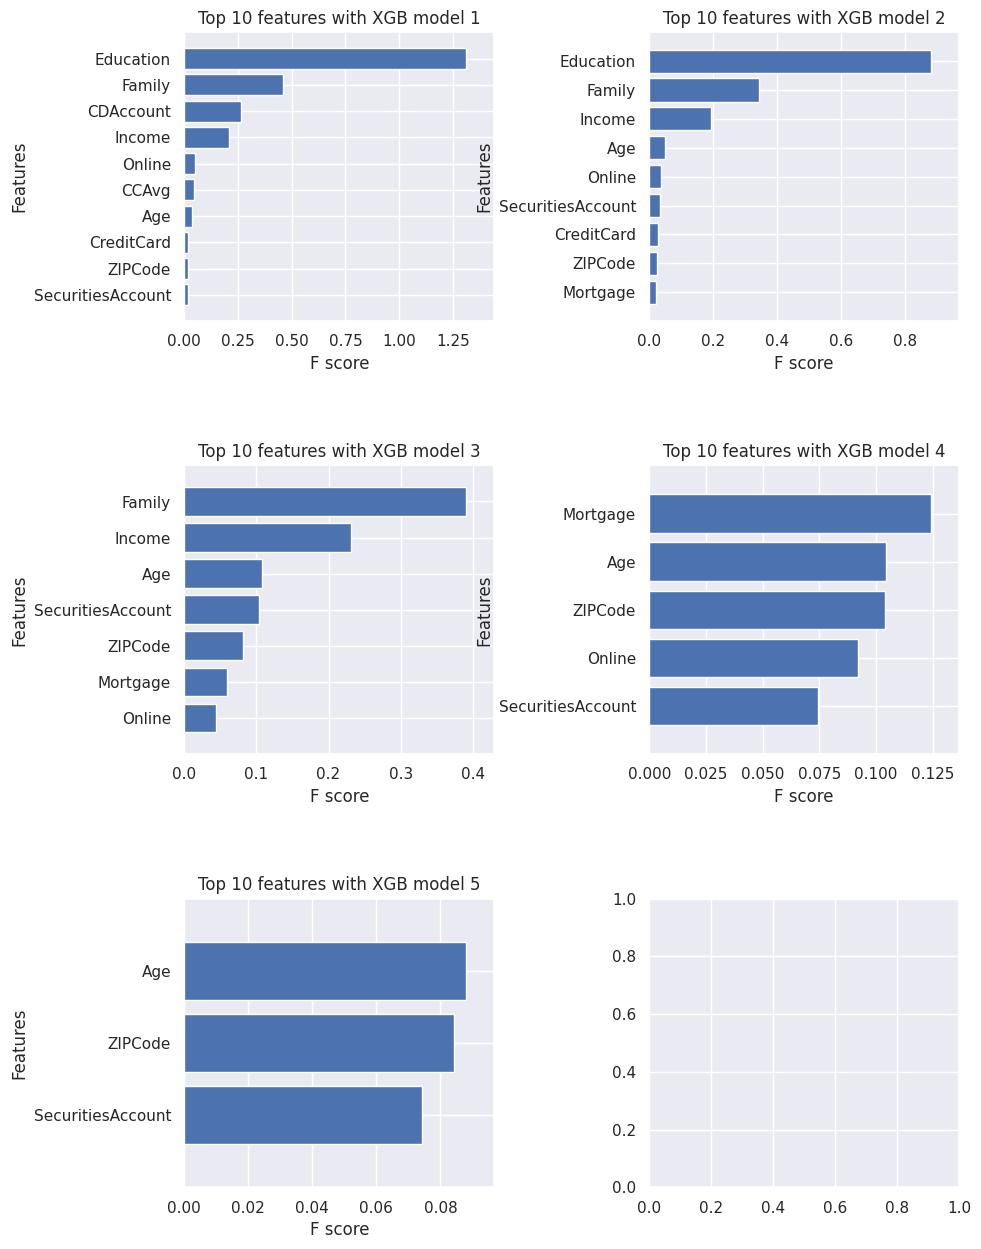

    Completed XGBoost feature selection in 2 seconds
    Alert: No ID variables ['ID'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['Education', 'Family', 'Mortgage', 'Age']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 4 important features and a train dataframe


In [100]:
# Feature Extraction

target = 'Personal Loan'

features, train = featurewiz(banking_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

The above code generated a feature selection & extraction report using the '**featurewiz**' function that helped in understanding which features are to be taken into consideration for the prediction of the loan where the target variable is the '**Personal Loan**' column.

The features selected by the featurewiz function are as shown below.

In [101]:
print("The extracted features are:")
features

The extracted features are:


['Education', 'Family', 'Mortgage', 'Age']

**2. Corelation Plot**


---
A **correlation plot** or matrix is a *visual representation of the variables* present in the dataset which helps in understanding the *relationship* between the different variables and how highly the variables are corelated to each other. 

The values of the correlation plot range from **-1 to 1**, where -1 indicates a **negative correlation** between the variables, 0 indicates **no correlation**, and 1 indicates a **positive correlation**. 

The variables that have positive correlation are said to be highly correlated to each and hence either of the two variables must be removed for the model building as it may lead to **multicollinearity** where the efficiency of the model may reduce. 

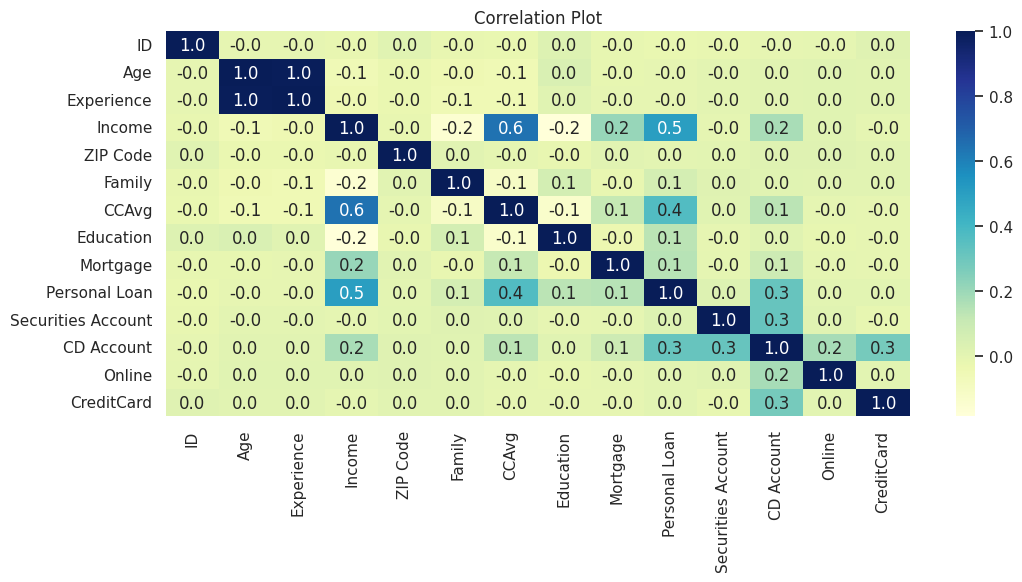

In [102]:
# plotting correlation matrix 

plt.figure(figsize = (12,5))
ax = plt.subplot()
sns.heatmap(banking_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot');

##### <center> <b> <i> Figure 9. Correlation Plot </center> </b> </i>

**Looking for corelations between independent & dependent variables**

---

As observed in the correlation matrix above, we see that there are many variables or features that are *highly correlated* to each other and hence we need to analyze the features that are strongly correlated such that these features are excluded from the training of the model in order to avoid **multicollinearity** and *improve the efficiency of the model*. The following features are highly correlated with the other features in the dataset and can be excluded from model building.


---
Correlation among the variables:

1. **Age** and **Experience** are highly correlated with each other with a correlation value of almost 1.0. Hence, Age is excluded from model building

2. **Income** is highly correlated with **CCAvg**

3. **Personal Loan** is highly correlated with **Income**, **CCAvg**, and **CD Account** 

4. **CD Account** is highly correlated with **Securities Amount**

6. **Credit Card** is correlated to **CD Account**

---



**Checking VIF score for Multicollinearity**



---

VIF score i.e., **Variance Inflation Factor** is a *measure of multicollinearity* between the independent variables in the regression analysis. This calculates the variance of the variables which helps in understanding the coefficient value and how much the variable is inflated due to collinearity in the model. The VIF score from **range 0 to 5** can be accepted to be considered for the training of the model, while values above 5 are considered to have high multicollinearity which would affect the accuracy and performance of the model, hence should be excluded. 

In [37]:
x = banking_data[['ID', 'Age', 'Experience', 'Income', 'Family', 'ZIP Code', 'CCAvg', 'Education', 'Mortgage', 'Securities Account','CD Account','Online','CreditCard']]
vif_score = pd.DataFrame()
vif_score["Feature"] = x.columns
vif_score["VIF Score"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_score)

               Feature    VIF Score
0                   ID     4.007942
1                  Age  1275.042750
2           Experience   314.685071
3               Income     6.596040
4               Family     5.541795
5             ZIP Code   367.803830
6                CCAvg     3.854692
7            Education     6.703085
8             Mortgage     1.375965
9   Securities Account     1.269910
10          CD Account     1.415041
11              Online     2.578500
12          CreditCard     1.569272


From the above code, it is observed that the VIF score for **'Age', 'Experience', and 'ZIP Code'** are not in the range of 0 to 5, or nearby the range of 0 to 5, which indicate that these variables are highly correlated and cause multicollinearity that will reduce the performance of the model. Hence, **these variables are excluded from model training.**

**a. Understanding the top features selected by Correlation Matrix**

---



In [ ]:
corr_result = banking_data.corr()
correlation_price = corr_result['Personal Loan'].sort_values(ascending=False)
topfeatures = correlation_price[1:5]  
print("The top features selected by correlation matrix are:")
print(topfeatures)

The top features selected by correlation matrix are:
Income        0.502462
CCAvg         0.366889
CD Account    0.316355
Mortgage      0.142095
Name: Personal Loan, dtype: float64


**b. Lasso Regression to select the most important features for model training**

---


In [ ]:
A = banking_data.drop(['Personal Loan'], axis=1)
B = banking_data['Personal Loan']
lasso_result = Lasso(alpha=0.1)
lasso_result.fit(A, B)
coef = pd.Series(lasso_result.coef_, index=A.columns)
features_lasso = coef.abs().sort_values(ascending=False).head(4).index
print("The top features selected by Lasso regression:")
print(features_lasso)

The top features selected by Lasso regression:
Index(['Income', 'Mortgage', 'ID', 'ZIP Code'], dtype='object')


**c. Features selected for model building**


---

The features that are selected for the model building based on the Feature Selection & Extraction, Correlation Plot, and Lasso Regression are as follows:

<center>

| Feature Selection & Extraction | Correlation Matrix | Lasso Regression |
| --- | --- | --- |
| Education | Income | Income |
| Family | CCAvg | Mortgage |
| Mortgage | CD Account | ID |
| Age | Mortgage | Zip Code |

</center>

<center> <i> Table 8. Features Selected & Extracted </center> </i>

**3. Defining the features for model training (Dimensionality Reduction)**


---

The model is trained & built on the below mentioned features that is selected from the analysis of the Feature selection and extraction report, Correlation matrix, Lasso regression, and VIF score for multicollinearity.

---

1. ID and Zip Code are not relevant for the model building
2. Age & Experience are highly correlated, hence age is excluded
3. Personal Loan has high correlation with Income, CCAvg, CD Account  
4. Age and Experience have higher VIF score indicating multicollinearity, hence are excluded from the model training 

In [3]:
X = banking_data[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account','CD Account','Online','CreditCard']]
y = banking_data['Personal Loan']

**4. Splitting the dataset into train & test set**


---

The dataset is split into training and testing data with a random split of **80%** train set and **20%** for test data. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

**Label Count in train & test dataset**

In [105]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [4520  480]
Labels count in y_train: [3625  375]
Labels count in y_test: [895 105]


**5. Standardization**


---

Standardization is performed on the split dataset in order to make the features selected comparable to a standardized scale.

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Standardization successful")

Standardization successful


### **Step 5: Model Building**


---

Building the **Logistic Regression** model to classify and predict the loan approval or rejection categories.


---



**Fitting the Logistic Regression model**

In [6]:
logisticreg_model = LogisticRegression()
logisticreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

---

**Q1. What were the three most significant variables?**

---


**Displaying the coefficients & intercepts after fitting the model**


---

As observed from the below code, the coefficient values of the variables are displayed which are either positive or negative, which indicates that the variables with **positive** value have a **positive relationship with the target variable** whereas values having a **negative sign** indicate that there is a **negative relationship between the independent variable and the target variable.** This indicates that it represents the estimated effect of each of the features the dependent variable, i.e., whether a loan is approved or not.

In [108]:
coefficient_values = pd.DataFrame({'Feature': X.columns, 'Coefficient': logisticreg_model.coef_[0]})
print('Coefficients:')
print(coefficient_values)

Coefficients:
              Feature  Coefficient
0              Income     2.389679
1              Family     0.805781
2               CCAvg     0.173407
3           Education     1.324014
4            Mortgage     0.056399
5  Securities Account    -0.264098
6          CD Account     0.895344
7              Online    -0.300469
8          CreditCard    -0.553302


---

**A1.**


---


In this case, the three **most significant features** based on their coefficients values *(i.e., highest positive coefficient value)* that contribute in the classification of loan prediction are as follows.

In [63]:
significant_features= coefficient_values.nlargest(3, 'Coefficient')
print(significant_features)

      Feature  Coefficient
0      Income     2.389679
3   Education     1.324014
6  CD Account     0.895344


---

**Q2. Which of those three had the most negative influence on loan acceptance?**

---

**Significant Variable Selection**

---

The variable selection metrics is used to identify the most significant variable or relevant features that needs to be included in the training of the Logistic Regression model. From the coefficients and p-values of the independent variables, and the standard error of the model, it is observed that **'Experience' and 'Mortgage'** are **not significant variables** and do not contribute in the classification of the loan approval model.

In [64]:
X2 = sm.add_constant(X)
logisticreg_model1 = sm.Logit(y, X2)
model_result = logisticreg_model1.fit(method='newton')
p_values = model_result.pvalues[1:]
standard_error = model_result.params[1:] / model_result.bse[1:]
significant_var = pd.DataFrame({'p-value': p_values, 'Standard Error': standard_error})
significant_var['Significant Variable'] = np.where(significant_var['p-value'] < 0.05, 'Yes', 'No')
print('\nSignificant Variable Selection Table:\n')
print(significant_var)

Optimization terminated successfully.
         Current function value: 0.128794
         Iterations 9

Significant Variable Selection Table:

                         p-value  Standard Error Significant Variable
Income              3.475464e-97       20.920623                  Yes
Family              1.820457e-20        9.272375                  Yes
CCAvg               3.055791e-03        2.962069                  Yes
Education           6.519947e-52       15.159869                  Yes
Mortgage            4.098820e-01        0.824101                   No
Securities Account  1.098241e-03       -3.264070                  Yes
CD Account          1.492924e-32       11.880600                  Yes
Online              2.011240e-05       -4.263639                  Yes
CreditCard          4.868773e-08       -5.456037                  Yes


**Summary Report of the Logistic Regression model**


---

Summary report of the Logistic Regression model provides an overview of the model build and how accurately the model fits the data for each independent variable to predict or classify the target variable or dependent variable. The report is used to evaluate the overall fit of the model, identify which independent variables are most important in predicting the dependent variable, and analyze the statistical significance of each coefficients.

---



*   From the summary report below, it is observed that **'CCAvg'** and **'Mortgage'** have *higher p-values*, i.e., greater than the significance value of 0.05, and hence it is ***not statistically significant*** indicating that these features are not contributing to the classification of loan approval.

*   Considering the **statistically significant variables**, there is a *positive coefficient* obtained for **Income** and **CD Account** where the **highest coefficient** value is for *CD Account* and thus it implies that this feature contributes  in the classification of loan approval. The recommendation is that the **CD Account** feature is the important parameter to be consider when *predicting or classifying whether or not to approve the loan* for the customer, which means that if the customer has a certificate of deposit account with the bank, the customer is most likely to get the loan approved. **Hence, the bank should check if the customer has a CD Account in order to approve the loan.**

---


In [109]:
model_summary = sm.Logit(endog=y, exog=X)
summary_result = model_summary.fit()
print(summary_result.summary())

Optimization terminated successfully.
         Current function value: 0.288454
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Thu, 27 Apr 2023   Pseudo R-squ.:                 0.08776
Time:                        21:13:08   Log-Likelihood:                -1442.3
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 2.503e-55
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Income                 0.0099      0.001      8.843      0.000       0.008       0.012
Famil

---

**A2.**

---

From the summary report, it is also observed that of the three most significant features, the **most negative influence on loan acceptance is 'Education'** as it has a negative coefficient value of the three features, which means that as the level of education increases, the likelihood of approving the loan decreases.

**Model Testing**

---



In [110]:
y_pred = logisticreg_model.predict(X_test_scaled)

**Q3. How accurate was the model overall, and what was the precision rate?**

---

**Evaluating the performance of the model**


---

1. Accuracy of the model on training and testing dataset

2. Confusion Matrix

3. Classification Report

4. AUC-ROC curve

---



In [67]:
# Accuracy of the model on training and testing set

print('Accuracy of Logistic Regressor model on training set: {:.3f}'.format(logisticreg_model.score(X_train_scaled, y_train)))
print('Accuracy of Logistic Regressor model on test set:     {:.3f}'.format(logisticreg_model.score(X_test_scaled, y_test)))

model_result = logisticreg_model.score(X_test_scaled, y_test)
model_result = round(model_result,4)
print("Overall Accuracy of the model is ",model_result)

Accuracy of Logistic Regressor model on training set: 0.952
Accuracy of Logistic Regressor model on test set:     0.956
Overall Accuracy of the model is  0.956


---

**A3.**

---



| Accuracy on Training Data | Accuracy on Testing Data |
| --- | --- |
| 95.2% | 95.6% |


---


The accuracy on training and testing data is almost similar, which indicates that the model efficiency is good on both training and testing sets of data. Hence, there is **no issue of overfitting or underfitting of the model.**

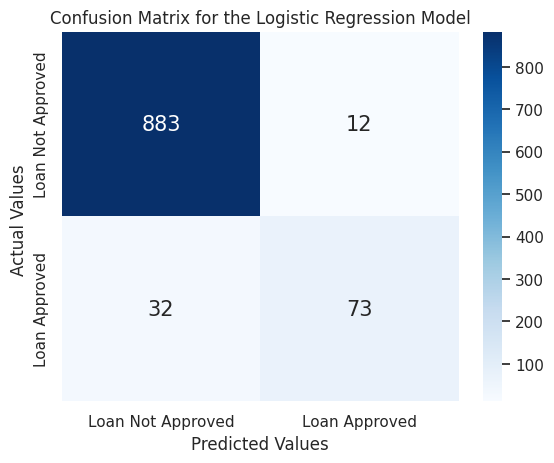

In [49]:
# Confusion Matrix

confusionmatrix_LR = confusion_matrix(y_test, y_pred)

fig = sns.heatmap(confusionmatrix_LR, annot=True,  annot_kws={"size": 15}, cmap = 'Blues', fmt='g')
fig.xaxis.set_ticklabels(['Loan Not Approved','Loan Approved'])
fig.yaxis.set_ticklabels(['Loan Not Approved','Loan Approved'])
fig.set_xlabel('Predicted Values')
fig.set_ylabel('Actual Values ')
fig.set_title('Confusion Matrix for the Logistic Regression Model')
sns.set(font_scale=1.0)

##### <center> <b> <i> Figure 10. Confusion Matrix </center> </b> </i>

The **confusion matrix** as shown above, helps in understanding the classification made by the model for the test dataset and how efficiently the labels are rightly classified. It summarizes the **performance** of the model and shows the number of *correct and incorrect predictions* that are made by the model.

As it is observed from the confusion matrix, the model has **correctly classified the 'Loan Not Approved' class 883 times, and has 12 times wrongly classified it as 'Loan Approved' class**. Similarly, the **'Loan Approved'** category is **correctly classified 73 times and wrongly classified into a different class 32 times**.

Here, we can also observe the class bias where the classification is biased towards one category of data values, i.e., 'Loan Not Approved'. The false positive and false negative values can be further analyzed in order to classify the data points which are wrongly classified into their correct categories.

Thus, the confusion matrix helps in understanding which labels are correctly classified and that which are wrongly classified into a different class.

In [50]:
# Classification Report

print("\n Classification report %s:\n%s\n" % (logisticreg_model, metrics.classification_report(y_test, y_pred)))


 Classification report LogisticRegression():
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       895
           1       0.86      0.70      0.77       105

    accuracy                           0.96      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.96      0.95      1000




From the classification report, it is observed that the precision rate for loan approval is 0.86, which means that 86% of the times the loan is accepted, whereas the recall rate is 0.70 indicating that the model missed 30% of the actual positive classes.

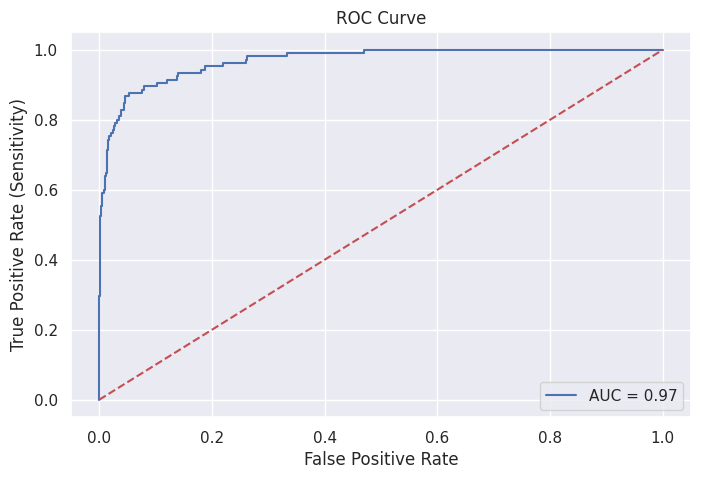

In [77]:
# AUC-ROC Curve

ypred_prob = logisticreg_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, ypred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,5))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate')
plt.show()

##### <center> <b> <i> Figure 11. AUC-ROC Curve </center> </b> </i>

The **AUC value** obtained from the above graph is **0.97** indicating that the model's performance is good and is able to classify the classes into their categories and also distinguish between positive and negative classes with high accuracy score. 

**A3.**

---

The classification report summarizes the performance of the model on the test data, and the various parameters such as precision, recall, f1-score help to analyze the model efficiency. This report is a way to measure the quality of the model built for classification or prediction of the target variable.

1. **Precision**: It is used to measure the accuracy of positive predictions, and high precision value indicates that the model is making few false positive predicitions. Here, the precision score of the model is **86%**, which means that around 86% were accepted out of all the cases that were predicted as loan acceptance.

2. **Recall**: It is the fraction of positive samples correctly classified by the model among all the positive data points. The recall percent for the loan approval dataset is **70%**.

3. **F1-score**: It is a measure of a model's accuracy that considers both the precision and the recall value where in this case, the f1-score on the test dataset is **77%**.

# **Results**

---

Perform the analysis and also be ready to answer the following three questions to your boss tomorrow morning:

1. What were the three most significant variables?
2. Which of those three had the most negative influence on loan acceptance?
3. How accurate was the model overall, and what was the precision rate?


---


**Q1. What were the three most significant variables?**

---


**A1.**


---

Based on the Logistics Regression analysis, it is observed that the three most significant variables are **'Income', 'Education', and 'CD Account'**. This indicates that the classification or prediction of loan approval or rejection will highly depend on these features as they have the highest coefficient values and hence contribute to the prediction of the loan approval analysis.

In [55]:
significant_features= coefficient_values.nlargest(3, 'Coefficient')
print("The three most significant variables are:\n")
print(significant_features)

The three most significant variables are:

      Feature  Coefficient
0      Income     2.389679
3   Education     1.324014
6  CD Account     0.895344


**Q2. Which of those three had the most negative influence on loan acceptance?**

---


**A2.**


---

Of the three most significant variables, i.e., Income, Education, and CD Account, **Education has the most negative influence on loan acceptance** which means that as the education level of the customer increases, the likelihood of loan approval decreased. This can be observed from the summary report analyzed above based on the p-values and coefficient values. The coefficient value of Education as observed from the summary report is **-0.44**, indicating a *44% decrease of loan approval as the level of education increases.*

**Q3. How accurate was the model overall, and what was the precision rate?**

---


**A3.**


---

* The accuracy of the model obtained for the **train data is 95.2%** whereas the accuracy for the **test data is 95.6%**. This indicates that the model is accurately able to predict the loan approval data 95.2% on the train data and 95.6% on test data, and since the accuracy of both the train and test dataset is almost nearby, we can conclude that the **model is not overfitted nor underfitted** and hence can be used to predict the loan approval for customers. **Hence, the overall accuracy of the model is 95.6%.**

* Apart from the accuracy metric, if we consider the **confusion matrix**, it helps to understand which classes are correctly classified and which are incorrectly classified. This is important as the **false positive and false negative values** will have a wrong impact on the decision making, which needs to be avoided. 

* The model is able to classify the **loan not approved category 883 time**s while **loan approved category is classified correctly 73 times**. The difference in the count of values is due to class bias, as majority of data points exist for the loan not approved class. The false postive and false negative values are as displayed in Figure 10. that indicates that these values need to be checked before making a decision.

* The *precision rate, recall, and f1-score* values are summarized above in the classification report which helps in analyzing the predicted values and how accurately the classes are classified, apart from the accuracy metric. The **precision rate for the logistic regression model for classification of loan approval is 86%** which indicates that the accuracy of predicting the positive values is high, hence fewer false positive predictions will be made.



# **Conclusion**


---

* **Logistic Regression models**

  Logistic regression model is a powerful machine learning algorithm that is used for classification to **predict binary outcomes**. It is a *statistical method that uses the sigmoid function to analyze the relationship between a binary dependent variable and one or more independent variables.* The goal here of a logistic regression model is to predict the probability of the event either occuring or not occuring.
  

* **Loan Approval Prediction using Logistic Regression model**
  
  The Loan Approval prediction uses a Logisitic Regression model to analyze the dataset in order to **predict whether a loan would be approved or not** for the customer that is based on the various features and parameters. Using Logistic Regression model to predict the loan approval is most suitable as it helps in understanding the parameters that contribute in the prediction or classification, thus helping in the decision-making process.
  
  From the exploratory data analysis, feature selection & extraction, VIF score, and model training, it is observed that the **three most significant** variables contributing to the prediction are **Income, Education,** and **CD Account**, of which **CD Account** has the highest positive coefficient value, which means it has a positive influence on loan approval, whereas **Education** had the most negative influence.
  

* **Model Performance & Accuracy**

  The overall model **accuracy** obtained was about **95.6%** for the test dataset, and the **precision rate** is about **86%** which indicate that the model is accurate in classifying and predicting the categories of loan approval. However, if we consider the **false positive and false negative** values from the confusion matrix, we conclude that there is still a need for model efficiency and thus the model can be improved and updated as new data points and features are added to the dataset.
  

* **Recommendations**
  
  * Based on the analysis and results, we conclude that the model is **neither overfitted nor underfitted** and hence can be used in future for further classification of loan approvals by updating new features and data points to increase the efficiency and performance of the model and reduce the false positive and false negative values.

  * The bank should increase focus on customers having **high income and CD Account**, as these variables had the most positive significant influence on loan approval.

  * Education had a **negative influence** on the loan approval, which means that customers with a higher level of education were less likely to get a loan, and hence the bank should focus on customers with lower education levels.

  * Overall model accuracy and precision rate of the model is good which indicates that the Logistic Regression model can be used to predict the loan approval categories.
  

* **Future Scope**

  Despite the model is accurately able to predict the classes of loan approval, the false positive and false negative values need to be minimized, along with the model performance. Thus, the model can be improved and updated based on new features being added to the dataset that can help to better analyze the target variable.

# **References**

**[1]** What is Logistic regression? | IBM. (n.d.). https://www.ibm.com/topics/logistic-regression


**[2]** Nawaz, H. (2022, April 2). Develop a Logistic Regression Machine Learning Model. Medium. https://blog.devgenius.io/develop-a-logistic-regression-machine-learning-model-64d2be403ba3


**[3]** seaborn.countplot — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.countplot.html


**[4]** Brownlee, J. (2020). Introduction to Dimensionality Reduction for Machine Learning. MachineLearningMastery.com. https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/#:~:text=Dimensionality%20reduction%20refers%20to%20techniques%20for%20reducing%20the%20number%20of,%E2%80%9Cessence%E2%80%9D%20of%20the%20data.

**[5]** Li, S. (2019, February 27). Building A Logistic Regression in Python, Step by Step. Medium. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

**[6]** Jcf2d. (n.d.). Logistic Regression Four Ways with Python | University of Virginia Library Research Data Services + Sciences. https://data.library.virginia.edu/logistic-regression-four-ways-with-python/#:~:text=8%3A07%20pm.-,What%20is%20Logistic%20Regression%3F,corresponding%20dependent%20variable%2C%20or%20response.